# Phân tích dữ liệu Bayesian 2022. LAB 7.
## Hồi quy.

Chúng ta có 1 bảng dữ liệu về liên hệ giữa hai đại lượng $X$ và $Y$ với $25$ mẫu như bên dưới:

| Chiều cao (cm)        | 14.36    | 14.48        | 14.53        | 14.52        | 14.35  | 14.31      | 14.44      | 14.23   | 14.32   |   14.57 | 14.28 | 14.36 | 14.50 | 14.52 | 14.28 | 14.13 |  14.54| 14.60 | 14.86 | 14.28 | 14.09 | 14.20 | 14.50 | 14.02 | 14.45 | 
| :-------------------: | :--------: | :--------: | :--------: | :--------: | :--------: | :--------: | :--------: | :--------: | :--------: | :--------: | :--------: | :--------: | :--------: | :--------: | :--------: | :--------: | :--------: | :--------: | :--------: | :--------: | :--------: | :--------: | :--------: | :--------: | :--------: |
| **Cân nặng (kg)**     | **13.84** | **14.41**     | **14.22**     | **14.63**     | **13.95**     | **14.37**     | **14.1** | **13.99**   |   **13.99** | **14.59** | **14.32** | **14.31**     | **14.43**     | **14.44**    | **14.14** | **13.90** | **14.37** | **14.34** | **14.78** | **13.76** | **13.85** | **13.89** | **14.22** | **13.80** | **14.67** |

Bài toán đặt ra là: liệu có thể dự đoán cân nặng của một người dựa vào chiều cao của họ không?

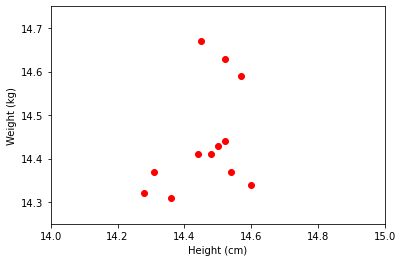

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
# height (cm)
X = np.array([[14.36, 14.48, 14.53, 14.52, 14.35, 14.31, 14.44, 14.23, 14.32, 14.57, 14.28, 14.36, 14.50, 14.52, 14.28, 14.13, 14.54, 14.60, 14.86, 14.28, 14.09, 14.20, 14.50, 14.02, 14.45]]).T
# weight (kg)
Y = np.array([[13.84, 14.41, 14.22, 14.63, 13.95, 14.37, 14.41, 13.99, 13.89, 14.59, 14.32, 14.31, 14.43, 14.44, 14.14, 13.90, 14.37, 14.34, 14.78, 13.76, 13.85, 13.89, 14.22, 13.80, 14.67]]).T
# Visualize data 
plt.plot(X, Y, 'ro')
plt.axis([14, 15, 14.25, 14.75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [2]:
#cân nặng (Y) = b_1 * (chiều cao X) + b_0 
#b_1 = slope, b_0 = intercept
#b_1 = (phương sai của X.Y) / (phương sai của X^2) = (tổng X.Y - n.mean(X).mean(Y)) / (tổng X.X - n*mean(X)*mean(X))
#b_0 = mean(Y) - b_1 * mean(X)
n = np.size(X)
m_x = np.mean(X)
m_y = np.mean(Y)
SS_xy = np.sum(Y*X) - n*m_y*m_x # tử số, trong đó sum(Y*X) = y1.x1 + y2.x2 + ... + yn.xn
SS_xx = np.sum(X*X) - n*m_x*m_x # mẫu số, trong đó sum(X*X) = x1.x1 + x2.x2 + ... + xn.xn

b_1 = SS_xy / SS_xx
b_0 = m_y - b_1*m_x
(b_0, b_1)

(-4.479382559230933, 1.2996346157588499)

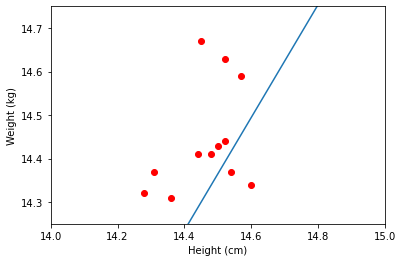

In [3]:
# Preparing the fitting line 
x0 = np.linspace(14, 15, 2, endpoint=True)
y0 = b_0 + b_1*x0
# Drawing the fitting line 
plt.plot(X.T, Y.T, 'ro')     # data 
plt.plot(x0, y0)             # the fitting line
plt.axis([14, 15, 14.25, 14.75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Phương pháp least square là non-parametric vì nó không quan tâm đến phân bố xác suất của data. Nó có thể áp dụng cho mọi loại data có 2 chiều, và ta không thể sử dụng các inference về slope/intercept. Để làm được điều đó, ta cần có thêm một số giả định:
1. Giả sử về mean: mean của y|x là một hàm tuyến tính theo x, tức là $\mu_{y|x} = \alpha_0 + \beta x$ với $\beta$ là hệ số góc chưa biết và $\alpha_0$ là intercept.
2. Các error có cùng phân phối chuẩn có mean = 0 và độc lập nhau đôi một.

Giả sử ta đã tìm được thông tin của đường thẳng hồi quy là $y = A + B x.$ Bây giờ ta xét tiên nghiệm kết hợp cho $\beta, \alpha_0$ lần lượt có các phân phối 
$$N(m_{\beta}, s_{\beta^2}), N(m_{\alpha_0}, s_{\alpha_0^2}).$$
Khi đó, công thức để tính hậu nghiệm của chúng, cũng đều là các phân phối chuẩn, lần lượt sẽ là
$$\frac{1}{s'^2_{\beta}} = \frac{1}{s_{\beta}^2} + \frac{SS_x}{\sigma^2} \text{ và } \frac{1}{s'^2_{\alpha_x}} = \frac{1}{s_{\alpha_x}^2} + \frac{n}{\sigma^2} $$ 
và
$$m'_{\beta} = s'^2_{\beta}(\frac{m_{\beta}}{s_{\beta}^2} + \frac{SS_x \times B}{\sigma^2}) \text{ và } m'_{\alpha_x} = s'^2_{\alpha_x}(\frac{m_{\alpha_x}}{s_{\alpha_x}^2} + \frac{n \cdot \overline Y}{\sigma^2}). $$

Trong công thức trên, chú ý $\sigma^2 = \frac{\sum_{i=1}^n (y_i-\overline{y})^2}{n-2} = \frac{n}{n-2} (\overline{y^2} - \overline{y}^2)$ và $SS_x = \sum_{i=1}^n (x_i-\overline{x})^2 = n(\overline{x^2} - \overline{x}^2).$

Từ các công thức trên, 

1. Hãy xác định phân phối hậu nghiệm cho cho $\beta, \alpha_0$.
2. Ước lượng khoảng tin cậy $90\%$ cho hệ số gốc có dạng $[\alpha_1; \alpha_2]$ và vẽ các đồ thị $$y=\alpha_0+\beta x, \, y=\alpha_1+\beta x, \, y = \alpha_2 + \beta x$$ lên trên cùng một hệ trục tọa độ. 

In [164]:
x_mean = X.mean()
y_mean = Y.mean()
xy_mean = np.mean(X*Y)
x2_mean = np.mean(X*x)
# for x,y in zip(X,Y):
#     tich_mean.extend(x*y)
#     x2.extend(x*x)
# xy_mean = np.array(tich_mean).mean()
# x2_mean = np.array(x2).mean()
beta = (xy_mean - x_mean*y_mean)/(x2_mean-x_mean**2)
alpha = y_mean - beta*x_mean

In [165]:
SSx =  n*(x2_mean-x_mean**2)
y_pred = alpha +beta*X
sigma = np.sum((Y-y_pred)**2)/23
(SSx,sigma)

(-4456.4991359999985, 0.09502140547016596)

$\beta\sim N (1, 0.3^2)$

$\alpha\sim N (15, 1^2)$

In [162]:
s_beta = 0.3**2
m_beta = 1
s_alpha = 1
m_alpha = 15
s_beta2 = 1/(1/s_beta + SSx/sigma)
s_alpha2 = 1/(1/s_alpha + n/sigma)
(s_beta2, s_alpha2)

(0.02890323108132822, 0.0013926346478379743)

In [163]:
m_beta = s_beta2 *(1/s_beta+SSx*beta/sigma)
m_alpha = s_alpha2*(m_alpha/s_alpha + n*y_mean/sigma)
(m_beta, m_alpha)

(1.2034078542115945, 14.221885140917598)

### Câu 2